In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [2]:
import re
import requests
import pandas as pd
import numpy as np
from time import sleep
from bs4 import BeautifulSoup


In [3]:
##Base url for reading in column names
base_url="https://services8.arcgis.com/DlJzJLOZpPXmMpWi/ArcGIS/rest/services/" 

In [5]:
##Race and ethnicity by county 
race=pd.read_csv("Race_and_Ethnicity_-_County.csv")

###Add colname
url=base_url+"Race_and_Ethnicity/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    col_name=parse[1]
    col_name=re.sub("alias: ","", col_name)
    colname.append(col_name)

race.columns=colname

display(race.head())


,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error
0,1,0500000US01001,Autauga County,Alabama,1001,42437,337,10565,230,159,68,568,166,32,36,409,348,1030,250,53672,NaN,1528,NaN
1,2,0500000US01003,Baldwin County,Alabama,1003,179526,747,19764,377,1522,337,1680,360,9,13,2034,783,3572,671,198754,NaN,9353,NaN
2,3,0500000US01005,Barbour County,Alabama,1005,12216,179,12266,196,72,43,96,40,1,3,778,192,353,161,24676,NaN,1106,NaN
3,4,0500000US01007,Bibb County,Alabama,1007,17268,70,5018,112,8,16,37,54,0,22,9,16,187,90,21980,NaN,547,NaN
4,5,0500000US01009,Blount County,Alabama,1009,55054,265,862,169,141,73,198,33,18,32,437,256,935,193,52384,NaN,5261,NaN


In [33]:
###Age and sex by county
age_sex=pd.read_csv("Population_by_Age_and_Sex_-_Counties.csv")

###Add colname
url=base_url+"Population/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    col_name=parse[1]
    col_name=re.sub("alias: ","", col_name)
    colname.append(col_name)

age_sex.columns=colname

display(age_sex.head())

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,Total Population - Males 40 to 44 Years *margin of error,Total Population - Males 45 to 49 Years,Total Population - Males 45 to 49 Years *margin of error,Total Population - Males 50 to 54 Years,Total Population - Males 50 to 54 Years *margin of error,Total Population - Males 55 to 59 Years,Total Population - Males 55 to 59 Years *margin of error,Total Population - Males 60 and 61 Years,Total Population - Males 60 and 61 Years *margin of error,Total Population - Males 62 to 64 Years,Total Population - Males 62 to 64 Years *margin of error,Total Female Population,Total Female Population *margin of error,Total Population - Females Under 5 Years,Total Population - Females Under 5 Years *margin of error,Total Population - Females 5 to 9 Years,Total Population - Females 5 to 9 Years *margin of error,Total Population - Females 10 to 14 Years,Total Population - Females 10 to 14 Years *margin of error,...,Total Population - Females 62 to 64 Years,Total Population - Females 62 to 64 Years *margin of error,Total Population - Female 65-66,Total Population - Female 65-66 *margin of error,Total Population - Male 65-66,Total Population - Male 65-66 *margin of error,Total Population - Female 67-69,Total Population - Female 67-69 *margin of error,Total Population - Male 67-69,Total Population - Male 67-69 *margin of error,Total Population - Female 70-74,Total Population - Female 70-74 *margin of error,Total Population - Male 70-74,Total Population - Male 70-74 *margin of error,Total Population - Female 75-79,Total Population - Female 75-79 *margin of error,Total Population - Male 75-79,Total Population - Male 75-79 *margin of error,Total Population - Female 80-84,Total Population - Female 80-84 *margin of error,Total Population - Male 80-84,Total Population - Male 80-84 *margin of error,Total Population - Female 85+,Total Population - Female 85+ *margin of error,Total Population - Male 85+,Total Population - Male 85+ *margin of error,Households w/Pop 65+ Living Alone,Households w/Pop 65+ Living Alone *margin of error,Total Households with one or more people 65 years and over,Total Households with one or more people 65 years and over *margin of error,Total Population - Under 5 years,Total Population - Under 5 years *margin of error,Total Population - 5 to 9 years,Total Population - 5 to 9 years *margin of error,Total Population - 65 to 74 years,Total Population - 65 to 74 years *margin of error,Total Population - 75 to 84 years,Total Population - 75 to 84 years *margin of error,Total Population - 85 years and over,Total Population - 85 years and over *margin of error,Total Population - 18 years and over,Total Population - 18 years and over *margin of error,Total Population - 65 years and over,Total Population - 65 years and over *margin 

In [36]:
demographic=pd.merge(race, 
                     age_sex.drop(columns=[' OBJECTID',' GEO_NAME', ' GEO_PARENT_NAME']),
                     on=" GEO_ID")
display(demographic.head())
print(demographic.shape)

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,...,Total Population - Females 62 to 64 Years,Total Population - Females 62 to 64 Years *margin of error,Total Population - Female 65-66,Total Population - Female 65-66 *margin of error,Total Population - Male 65-66,Total Population - Male 65-66 *margin of error,Total Population - Female 67-69,Total Population - Female 67-69 *margin of error,Total Population - Male 67-69,Total Population - Male 67-69 *margin of error,Total Population - Female 70-74,Total Population - Female 70-74 *margin of error,Total Population - Male 70-74,Total Population - Male 70-74 *margin of error,Total Population - Female 75-79,Total Population - Female 75-79 *margin of error,Total Population - Male 75-79,Total Population - Male 75-79 *margin of error,Total Population - Female 80-84,Total Population - Female 80-84 *margin of error,Total Population - Male 80-84,Total Population - Male 80-84 *margin of error,Total Population - Female 85+,Total Population - Female 85+ *margin of error,Total Population - Male 85+,Total Population - Male 85+ *margin of error,Households w/Pop 65+ Living Alone,Households w/Pop 65+ Living Alone *margin of error,Total Households with one or more people 65 years and over,Total Households with one or more people 65 years and over *margin of error,Total Population - Under 5 years,Total Population - Under 5 years *margin of error,Total Population - 5 to 9 years,Total Population - 5 to 9 years *margin of error,Total Population - 65 to 74 years,Total Population - 65 to 74 years *margin of error,Total Population - 75 to 84 years,Total Population - 75 to 84 years *margin of error,Total Population - 85 years and over,Total Population - 85 years and over *margin of error,Total Population - 18 years and over,Total Population - 18 years and over *margin of error,T

(3220, 145)


In [6]:
##Non employment 
nonemploy=pd.read_csv("Non_Employer_Statistics_-_Counties.csv")

###Add colname
url=base_url+"Non_Employer_Statistics/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    if(len(parse)>1):
        col_name=parse[1]
        col_name=re.sub("alias: ","", col_name)
        colname.append(col_name)

nonemploy.columns=colname

display(nonemploy.head())


,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Non-Employer Revenue All Industries (NAICS 00),Total Non-Employer Revenue Grocery stores (NAICS 4451),Total Non-Employer Revenue Pharmacies and Drug Stores (NAICS 44611),Total Non-Employer Revenue School and Employee Bus Transportation (NAICS 4854),Total Non-Employer Revenue Motion Picture and Video Industries (NAICS 5121),Total Non-Employer Revenue Offices of Physicians (NAICS 6211),Total Non-Employer Revenue Outpatient Care Centers (NAICS 6214),Total Non-Employer Revenue Medical and Diagnostic Laboratories (NAICS 6215),Total Non-Employer Revenue Other Ambulatory Health Care Services (NAICS 6219),Total Non-Employer Revenue Child Day Care Services (NAICS 6244),Total Non-Employer Revenue Performing Arts Companies (NAICS 7111),Total Non-Employer Revenue Spectator Sports (NAICS 7112),Total Non-Employer Revenue Museums,Total Non-Employer Revenue Amusement Parks and Arcades (NAICS 7131),Total Non-Employer Revenue Traveler Accommodation (NAICS 7211),Total Non-Employer Revenue Drinking Places (Alcoholic Beverages) (NAICS 7224),Total Non-Employer Revenue Restaurants and Other Eating Places (NAICS 7225),Total Non-Employer Revenue Personal Care Services (NAICS 8121),Average Revenue per Non-Employer Establishment (NAICS 00): 2017,Total Non-Employer Establishments All Industries (NAICS 00),Total Non-Employer Establishments Grocery stores (NAICS 4451),Total Non-Employer Establishments Pharmacies and Drug Stores (NAICS 44611),Total Non-Employer Establishments School and Employee Bus Transportation (NAICS 4854),Total Non-Employer Establishments Motion Picture and Video Industries (NAICS 5121),Total Non-Employer Establishments Offices of Physicians (NAICS 6211),Total Non-Employer Establishments Outpatient Care Centers (NAICS 6214),Total Non-Employer Establishments Medical and Diagnostic Laboratories (NAICS 6215),Total Non-Employer Establishments Other Ambulatory Health Care Services (NAICS 6219),Total Non-Employer Establishments Child Day Care Services (NAICS 6244),Total Non-Employer Establishments Performing Arts Companies (NAICS 7111),Total Non-Employer Establishments Spectator Sports (NAICS 7112),Total Non-Employer Establishments Museums,Total Non-Employer Establishments Amusement Parks and Arcades (NAICS 7131),Total Non-Employer Establishments Traveler Accommodation (NAICS 7211),Total Non-Employer Establishments Drinking Places (Alcoholic Beverages) (NAICS 7224),Total Non-Employer Establishments Restaurants and Other Eating Places (NAICS 7225),Total Non-Employer Establishments Personal Care Services (NAICS 8121)
0,1,0500000US01001,Autauga County,Alabama,1001,126991.0,88.0,NaN,NaN,0.0,1934.0,0.0,0.0,42.0,530.0,245.0,143.0,NaN,NaN,91.0,0.0,1009.0,6902.0,39270.0,3234.0,7.0,NaN,NaN,0.0,17.0,0.0,0.0,7.0,40.0,9.0,19.0,NaN,NaN,4.0,0.0,13.0,261.0
1,2,0500000US01003,Baldwin County,Alabama,1003,979262.0,214.0,25.0,24.0,778.0,20353.0,120.0,585.0,259.0,2703.0,1389.0,1737.0,92.0,198.0,3264.0,1013.0,10742.0,23896.0,50460.0,19408.0,14.0,4.0,3.0,31.0,210.0,7.0,11.0,27.0,215.0,66.0,110.0,4.0,9.0,28.0,26.0,83.0,819.0
2,3,0500000US01005,Barbour County,Alabama,1005,45457.0,147.0,NaN,NaN,NaN,59.0,0.0,NaN,0.0,432.0,17.0,6.0,0.0,NaN,0.0,0.0,2152.0,2620.0,32960.0,1379.0,3.0,NaN,NaN,NaN,3.0,0.0,NaN,0.0,37.0,4.0,3.0,0.0,NaN,0.0,0.0,11.0,144.0
3,4,0500000US01007,Bibb County,Alabama,1007,46347.0,0.0,NaN,NaN,NaN,19.0,NaN,NaN,0.0,132.0,19.0,0.0,NaN,NaN,0.0,0.0,196.0,1691.0,40300.0,1150.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,0.0,15.0,3.0,0.0,NaN,NaN,0.0,0.0,5.0,87.0
4,5,0500000US01009,Blount County,Alabama,1009,141762.0,126.0,NaN,0.0,40.0,310.0,0.0,113.0,58.0,286.0,18.0,221.0,NaN,NaN,264.0,0.0,1274.0,4017.0,39730.0,3568.0,4.0,NaN,0.0,4.0,7.0,0.0,7.0,8.0,23.0,5.0,23.0,NaN,NaN,5.0,0.0,27.0,167.0


In [37]:
demographic=pd.merge(demographic, 
                     nonemploy.drop(columns=[' OBJECTID',' GEO_NAME', ' GEO_PARENT_NAME', ' FIPS_CODE']),
                     on=" GEO_ID")
display(demographic.head())
print(demographic.shape)

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,...,Total Population - 75 to 84 years *margin of error,Total Population - 85 years and over,Total Population - 85 years and over *margin of error,Total Population - 18 years and over,Total Population - 18 years and over *margin of error,Total Population - 65 years and over,Total Population - 65 years and over *margin of error,Total Population - Male 65 and over,Total Population - Male 65 and over *margin of error,Total Population - Female 65 and over,Total Population - Female 65 and over *margin of error,Population in Dependant Age (under 18 and 65+),Population in Dependant Age (under 18 and 65+) *margin of error,Total Non-Employer Revenue All Industries (NAICS 00),Total Non-Employer Revenue Grocery stores (NAICS 4451),Total Non-Employer Revenue Pharmacies and Drug Stores (NAICS 44611),Total Non-Employer Revenue School and Employee Bus Transportation (NAICS 4854),Total Non-Employer Revenue Motion Picture and Video Industries (NAICS 5121),Total Non-Employer Revenue Offices of Physicians (NAICS 6211),Total Non-Employer Revenue Outpatient Care Centers (NAICS 6214),Total Non-Employer Revenue Medical and Diagnostic Laboratories (NAICS 6215),Total Non-Employer Revenue Other Ambulatory Health Care Services (NAICS 6219),Total Non-Employer Revenue Child Day Care Services (NAICS 6244),Total Non-Employer Revenue Performing Arts Companies (NAICS 7111),Total Non-Employer Revenue Spectator Sports (NAICS 7112),Total Non-Employer Revenue Museums,Total Non-Employer Revenue Amusement Parks and Arcades (NAICS 7131),Total Non-Employer Revenue Traveler Accommodation (NAICS 7211),Total Non-Employer Revenue Drinking Places (Alcoholic Beverages) (NAICS 7224),Total Non-Employer Revenue Restaurants and Other Eating Places (NAICS 7225),Total Non-Employer Revenue Personal Care Se

(3220, 182)


In [7]:
##CBP
cbp=pd.read_csv("County_Business_Patterns_-_Counties.csv")

###Add colname
url=base_url+"County_Business_Pattern/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    if(len(parse)>1):
        col_name=parse[1]
        col_name=re.sub("alias: ","", col_name)
        colname.append(col_name)

cbp.columns=colname

display(cbp.head())


,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Employees All Industries (NAICS 00),Total Employees Grocery stores (NAICS 4451),Total Employees Pharmacies and Drug Stores (NAICS 44611),Total Employees Scheduled Air Transportation (NAICS 4811),Total Employees School and Employee Bus Transportation (NAICS 4854),Total Employees Motion Picture and Video Industries (NAICS 5121),Total Employees Offices of Physicians (NAICS 6211),Total Employees Outpatient Care Centers (NAICS 6214),Total Employees Medical and Diagnostic Laboratories (NAICS 6215),Total Employees Other Ambulatory Health Care Services (NAICS 6219),Total Employees General Medical and Surgical Hospitals (NAICS 6221),Total Employees Nursing Care Facilities (Skilled Nursing Facilities) (NAICS 6231),Total Employees Child Day Care Services (NAICS 6244),Total Employees Performing Arts Companies (NAICS 7111),Total Employees Spectator Sports (NAICS 7112),Total Employees Museums,Total Employees Amusement Parks and Arcades (NAICS 7131),Total Employees Traveler Accommodation (NAICS 7211),Total Employees Drinking Places (Alcoholic Beverages) (NAICS 7224),Total Employees Restaurants and Other Eating Places (NAICS 7225),Total Employees Personal Care Services (NAICS 8121),Average annual payroll per employee (NAICS 00): 2017,Number of all establishments (NAICS 00): 2017,Total Employer Establishments Grocery stores (NAICS 4451),Total Employer Establishments Pharmacies and Drug Stores (NAICS 44611),Total Employer Establishments Scheduled Air Transportation (NAICS 4811),Total Employer Establishments School and Employee Bus Transportation (NAICS 4854),Total Employer Establishments Motion Picture and Video Industries (NAICS 5121),Total Employer Establishments Offices of Physicians (NAICS 6211),Total Employer Establishments Outpatient Care Centers (NAICS 6214),Total Employer Establishments Medical and Diagnostic Laboratories (NAICS 6215),Total Employer Establishments Other Ambulatory Health Care Services (NAICS 6219),Total Employer Establishments General Medical and Surgical Hospitals (NAICS 6221),Total Employer Establishments Nursing Care Facilities (Skilled Nursing Facilities) (NAICS 6231),Total Employer Establishments Child Day Care Services (NAICS 6244),Total Employer Establishments Performing Arts Companies (NAICS 7111),Total Employer Establishments Spectator Sports (NAICS 7112),Total Employer Establishments Museums,Total Employer Establishments Amusement Parks and Arcades (NAICS 7131),Total Employer Establishments Traveler Accommodation (NAICS 7211),Total Employer Establishments Drinking Places (Alcoholic Beverages) (NAICS 7224),Total Employer Establishments Restaurants and Other Eating Places (NAICS 7225),Total Employees Personal Care Services (NAICS 8121)
0,1,0500000US01001,Autauga County,Alabama,1001,11036.0,299.0,66.0,NaN,NaN,NaN,191.0,29.0,NaN,NaN,NaN,NaN,165.0,NaN,NaN,NaN,NaN,173.0,NaN,2238.0,44.0,32710.0,869.0,5.0,6.0,NaN,NaN,NaN,23.0,4.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,8.0,NaN,87.0,17.0
1,2,0500000US01003,Baldwin County,Alabama,1003,61792.0,1738.0,523.0,NaN,NaN,143.0,1384.0,318.0,0.0,407.0,0.0,564.0,495.0,NaN,NaN,55.0,415.0,2188.0,172.0,10530.0,253.0,33780.0,5384.0,34.0,37.0,NaN,NaN,9.0,143.0,32.0,9.0,10.0,3.0,5.0,39.0,NaN,NaN,3.0,11.0,64.0,19.0,467.0,65.0
2,3,0500000US01005,Barbour County,Alabama,1005,6834.0,163.0,44.0,NaN,NaN,NaN,49.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,585.0,NaN,34690.0,455.0,5.0,7.0,NaN,NaN,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,43.0,NaN
3,4,0500000US01007,Bibb County,Alabama,1007,3484.0,107.0,33.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,221.0,NaN,39100.0,284.0,5.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
4,5,0500000US01009,Blount County,Alabama,1009,6645.0,118.0,86.0,NaN,NaN,NaN,84.0,124.0,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,658.0,9.0,32380.0,698.0,7.0,11.0,NaN,NaN,NaN,11.0,5.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,4.0


In [38]:
demographic=pd.merge(demographic, 
                     cbp.drop(columns=[' OBJECTID',' GEO_NAME', ' GEO_PARENT_NAME', ' FIPS_CODE']),
                     on=" GEO_ID")
display(demographic.head())
print(demographic.shape)

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,...,Total Non-Employer Establishments Spectator Sports (NAICS 7112),Total Non-Employer Establishments Museums,Total Non-Employer Establishments Amusement Parks and Arcades (NAICS 7131),Total Non-Employer Establishments Traveler Accommodation (NAICS 7211),Total Non-Employer Establishments Drinking Places (Alcoholic Beverages) (NAICS 7224),Total Non-Employer Establishments Restaurants and Other Eating Places (NAICS 7225),Total Non-Employer Establishments Personal Care Services (NAICS 8121),Total Employees All Industries (NAICS 00),Total Employees Grocery stores (NAICS 4451),Total Employees Pharmacies and Drug Stores (NAICS 44611),Total Employees Scheduled Air Transportation (NAICS 4811),Total Employees School and Employee Bus Transportation (NAICS 4854),Total Employees Motion Picture and Video Industries (NAICS 5121),Total Employees Offices of Physicians (NAICS 6211),Total Employees Outpatient Care Centers (NAICS 6214),Total Employees Medical and Diagnostic Laboratories (NAICS 6215),Total Employees Other Ambulatory Health Care Services (NAICS 6219),Total Employees General Medical and Surgical Hospitals (NAICS 6221),Total Employees Nursing Care Facilities (Skilled Nursing Facilities) (NAICS 6231),Total Employees Child Day Care Services (NAICS 6244),Total Employees Performing Arts Companies (NAICS 7111),Total Employees Spectator Sports (NAICS 7112),Total Employees Museums,Total Employees Amusement Parks and Arcades (NAICS 7131),Total Employees Traveler Accommodation (NAICS 7211),Total Employees Drinking Places (Alcoholic Beverages) (NAICS 7224),Total Employees Restaurants and Other Eating Places (NAICS 7225),Total Employees Personal Care Services (NAICS 8121),Average annual payroll per employee (NAICS 00): 2017,Number of all establishments (NAICS 00): 2017

(3220, 225)


In [8]:
##income and benefits
income=pd.read_csv("Income_and_Benefits_-_Counties.csv")

###Add colname
url=base_url+"Income_and_Benefits/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    if(len(parse)>1):
        col_name=parse[1]
        col_name=re.sub("alias: ","", col_name)
        colname.append(col_name)

income.columns=colname

display(income.head())

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Households,Total Households *margin of error,Total Households with Income - less than $10,Total Households with Income - less than $10,Total Households with Income - $10,Total Households with Income - $10,Total Households with Income - $15,Total Households with Income - $15,Total Households with Income - $25,Total Households with Income - $25,Total Households with Income - $35,Total Households with Income - $35,Total Households with Income - $50,Total Households with Income - $50,Total Households with Income - $75,Total Households with Income - $75,Total Households - with Supplemental Security Income,Total Households - with Supplemental Security Income *margin of error,Total Households - with cash public assistance income,Total Households - with cash public assistance income *margin of error,Total Households - with Food Stamp/SNAP benefits in the past 12 months,Total Households - with Food Stamp/SNAP benefits in the past 12 months *margin of error,Percent of Households whose income in the past 12 months was less than $75,Total Households with Income - less than $75,Total Households with Income - less than $75,Households: Receiving Food Stamps/SNAP (%),Households: Receiving Food Stamps/SNAP (%) *margin of error
0,1,0500000US01001,Autauga County,Alabama,1001,21115,383,1496.0,244.0,1221.0,279.0,2142.0,303.0,1671.0,299.0,2507.0,349.0,3819.0,456.0,2967.0,409.0,1165.0,215.0,284.0,132.0,2692.0,390.0,60.89,12856.0,805,12.7,1.8
1,2,0500000US01003,Baldwin County,Alabama,1003,78622,1183,4227.0,455.0,4078.0,557.0,7216.0,677.0,8626.0,755.0,10589.0,929.0,15144.0,910.0,9691.0,712.0,3388.0,442.0,1079.0,265.0,5926.0,574.0,63.44,49880.0,1799,7.5,0.7
2,3,0500000US01005,Barbour County,Alabama,1005,9186,280,1225.0,198.0,822.0,137.0,1517.0,220.0,1112.0,178.0,1301.0,195.0,1317.0,222.0,806.0,170.0,954.0,164.0,261.0,86.0,2516.0,239.0,79.40,7294.0,475,27.4,2.6
3,4,0500000US01007,Bibb County,Alabama,1007,6840,321,437.0,158.0,559.0,146.0,883.0,236.0,762.0,200.0,1028.0,244.0,1141.0,204.0,1000.0,266.0,483.0,134.0,306.0,160.0,849.0,223.0,70.32,4810.0,493,12.4,3.2
4,5,0500000US01009,Blount County,Alabama,1009,20600,396,1723.0,266.0,1162.0,224.0,2346.0,332.0,2587.0,379.0,2707.0,325.0,4297.0,451.0,2461.0,275.0,1656.0,271.0,327.0,128.0,1966.0,334.0,71.95,14822.0,827,9.5,1.6


In [39]:
demographic=pd.merge(demographic, 
                     income.drop(columns=[' OBJECTID',' GEO_NAME', ' GEO_PARENT_NAME', ' FIPS_CODE']),
                     on=" GEO_ID")
display(demographic.head())
print(demographic.shape)

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,...,Total Employees Personal Care Services (NAICS 8121),Average annual payroll per employee (NAICS 00): 2017,Number of all establishments (NAICS 00): 2017,Total Employer Establishments Grocery stores (NAICS 4451),Total Employer Establishments Pharmacies and Drug Stores (NAICS 44611),Total Employer Establishments Scheduled Air Transportation (NAICS 4811),Total Employer Establishments School and Employee Bus Transportation (NAICS 4854),Total Employer Establishments Motion Picture and Video Industries (NAICS 5121),Total Employer Establishments Offices of Physicians (NAICS 6211),Total Employer Establishments Outpatient Care Centers (NAICS 6214),Total Employer Establishments Medical and Diagnostic Laboratories (NAICS 6215),Total Employer Establishments Other Ambulatory Health Care Services (NAICS 6219),Total Employer Establishments General Medical and Surgical Hospitals (NAICS 6221),Total Employer Establishments Nursing Care Facilities (Skilled Nursing Facilities) (NAICS 6231),Total Employer Establishments Child Day Care Services (NAICS 6244),Total Employer Establishments Performing Arts Companies (NAICS 7111),Total Employer Establishments Spectator Sports (NAICS 7112),Total Employer Establishments Museums,Total Employer Establishments Amusement Parks and Arcades (NAICS 7131),Total Employer Establishments Traveler Accommodation (NAICS 7211),Total Employer Establishments Drinking Places (Alcoholic Beverages) (NAICS 7224),Total Employer Establishments Restaurants and Other Eating Places (NAICS 7225),Total Employees Personal Care Services (NAICS 8121),Total Households,Total Households *margin of error,Total Households with Income - less than $10,Total Households with Income - less than $10,Total Households with Income - $10,Total Households with Income - $10,T

(3220, 252)


In [9]:
##Health insurance coverage
insurance=pd.read_csv("Health_Insurance_Coverage_-_Counties.csv")

###Add colname
url=base_url+"Health_Insurance_Coverage/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    if(len(parse)>1):
        col_name=parse[1]
        col_name=re.sub("alias: ","", col_name)
        colname.append(col_name)

insurance.columns=colname

display(insurance.head())

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Employer Insurance only - Pop &lt; 19,Employer Insurance only - Pop &lt; 19 *margin of error,Employer Insurance only - Pop 19-34,Employer Insurance only - Pop 19-34 *margin of error,Employer Insurance only - Pop 35-64,Employer Insurance only - Pop 35-64 *margin of error,Employer Insurance only - Pop 65+,Employer Insurance only - Pop 65+ *margin of error,Direct Purchase only - Pop &lt; 19,Direct Purchase only - Pop &lt; 19 *margin of error,Direct Purchase only - Pop 19-34,Direct Purchase only - Pop 19-34 *margin of error,Direct Purchase only - Pop 35-64,Direct Purchase only - Pop 35-64 *margin of error,Direct Purchase only - Pop 65+,Direct Purchase only - Pop 65+ *margin of error,Medicare only - Pop &lt; 19,Medicare only - Pop &lt; 19 *margin of error,Medicare only - Pop 19-34,Medicare only - Pop 19-34 *margin of error,Medicare only - Pop 35-64,Medicare only - Pop 35-64 *margin of error,Medicare only - Pop 65+,Medicare only - Pop 65+ *margin of error,Medicaid only - Pop &lt; 19,Medicaid only - Pop &lt; 19 *margin of error,Medicaid only - Pop 19-34,Medicaid only - Pop 19-34 *margin of error,Medicaid only - Pop 35-64,Medicaid only - Pop 35-64 *margin of error,Medicaid only - Pop 65+,TRICARE/Military only: - Pop &lt; 19,TRICARE/Military only: - Pop &lt; 19 *margin of error,TRICARE/Military only: - Pop 19-34,TRICARE/Military only: - Pop 19-34 *margin of error,TRICARE/Military only: - Pop 35-64,TRICARE/Military only: - Pop 35-64 *margin of error,TRICARE/Military only: - Pop 65+,TRICARE/Military only: - Pop 65+ *margin of error,VA Health Care only - Pop &lt; 19,VA Health Care only - Pop &lt; 19 *margin of error,VA Health Care only - Pop 19-34,VA Health Care only - Pop 19-34 *margin of error,VA Health Care only - Pop 35-64,VA Health Care only - Pop 35-64 *margin of error,VA Health Care only - Pop 65+,VA Health Care only - Pop 65+ *margin of error,2 or more Insurance - Pop &lt; 19,2 or more Insurance - Pop &lt; 19 *margin of error,2 or more Insurance - Pop 19-34,2 or more Insurance - Pop 19-34 *margin of error,2 or more Insurance - Pop 35-64,2 or more Insurance - Pop 35-64 *margin of error,2 or more Insurance - Pop 65+,2 or more Insurance - Pop 65+ *margin of error,Population with no Health Insurance Ages - 0-18,Population with no Health Insurance Ages - 0-18 *margin of error,Population with no Health Insurance Ages - 19-34,Population with no Health Insurance Ages - 19-34 *margin of error,Population with no Health Insurance Ages - 35-64,Population with no Health Insurance Ages - 35-64 *margin of error,Population with no Health Insurance Ages - Age 65+,Population with no Health Insurance Ages - Age 65+ *margin of error,Civilian noninstitutionalized population with Health Coverage,Civilian noninstitutionalized population with Health Coverage *margin of error,Total Civilian Noninstitutionalized Population - With health insurance coverage,Total Civilian Noninstitutionalized Population - With health insurance coverage *margin of error,Total Civilian Noninstitutionalized Population - With private health insurance,Total Civilian Noninstitutionalized Population - With private health insurance *margin of error,Total Civilian Noninstitutionalized Population - With public coverage,Total Civilian Noninstitutionalized Population - With public coverage *margin of error,Total Civilian Noninstitutionalized Population - No health insurance coverage,Total Civilian Noninstitutionalized Population - No health insurance coverage *margin of error,Civilian noninstitutionalized population under 19 years,Civilian noninstitutionalized population under 19 years *margin of error,Total Civilian Noninstitutionalized Population under 19 yrs - No health insurance coverage,Total Civilian Noninstitutionalized Population under 19 yrs - No health insurance coverage *margin of error,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error
0,1,0500000

In [40]:
demographic=pd.merge(demographic, 
                     insurance.drop(columns=[' OBJECTID',' GEO_NAME', ' GEO_PARENT_NAME', ' FIPS_CODE']),
                     on=" GEO_ID")
display(demographic.head())
print(demographic.shape)

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,...,Medicaid only - Pop 35-64 *margin of error,Medicaid only - Pop 65+,TRICARE/Military only: - Pop &lt; 19,TRICARE/Military only: - Pop &lt; 19 *margin of error,TRICARE/Military only: - Pop 19-34,TRICARE/Military only: - Pop 19-34 *margin of error,TRICARE/Military only: - Pop 35-64,TRICARE/Military only: - Pop 35-64 *margin of error,TRICARE/Military only: - Pop 65+,TRICARE/Military only: - Pop 65+ *margin of error,VA Health Care only - Pop &lt; 19,VA Health Care only - Pop &lt; 19 *margin of error,VA Health Care only - Pop 19-34,VA Health Care only - Pop 19-34 *margin of error,VA Health Care only - Pop 35-64,VA Health Care only - Pop 35-64 *margin of error,VA Health Care only - Pop 65+,VA Health Care only - Pop 65+ *margin of error,2 or more Insurance - Pop &lt; 19,2 or more Insurance - Pop &lt; 19 *margin of error,2 or more Insurance - Pop 19-34,2 or more Insurance - Pop 19-34 *margin of error,2 or more Insurance - Pop 35-64,2 or more Insurance - Pop 35-64 *margin of error,2 or more Insurance - Pop 65+,2 or more Insurance - Pop 65+ *margin of error,Population with no Health Insurance Ages - 0-18,Population with no Health Insurance Ages - 0-18 *margin of error,Population with no Health Insurance Ages - 19-34,Population with no Health Insurance Ages - 19-34 *margin of error,Population with no Health Insurance Ages - 35-64,Population with no Health Insurance Ages - 35-64 *margin of error,Population with no Health Insurance Ages - Age 65+,Population with no Health Insurance Ages - Age 65+ *margin of error,Civilian noninstitutionalized population with Health Coverage,Civilian noninstitutionalized population with Health Coverage *margin of error,Total Civilian Noninstitutionalized Population - With health insurance coverage,Total Civilian Noninstitutionali

(3220, 331)


In [10]:
##housing tenure
housing_tenure=pd.read_csv("Housing_Tenure_-_Counties.csv")

###Add colname
url=base_url+"Housing_Occupancy/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    if(len(parse)>1):
        col_name=parse[1]
        col_name=re.sub("alias: ","", col_name)
        colname.append(col_name)

housing_tenure.columns=colname

display(housing_tenure.head())

,OBJECTID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit *margin of error,Average Household Size of Renter-Occupied Unit,Average Household Size of Renter-Occupied Unit *margin of error,Percent of Renter-occupied Units,Percent of Renter-occupied Units *margin of error
0,1,Autauga County,Alabama,1001,2.59,0.07,2.60,0.16,25.1,2.0
1,2,Baldwin County,Alabama,1003,2.66,0.06,2.48,0.11,26.4,1.2
2,3,Barbour County,Alabama,1005,2.44,0.11,2.58,0.15,38.6,3.0
3,4,Bibb County,Alabama,1007,3.05,0.18,2.81,0.38,24.9,3.9
4,5,Blount County,Alabama,1009,2.85,0.07,2.48,0.15,21.4,1.9


In [42]:
demographic=pd.merge(demographic, 
                     housing_tenure.drop(columns=[' OBJECTID',' GEO_NAME', ' GEO_PARENT_NAME']),
                     on=" FIPS_CODE")
display(demographic.head())
print(demographic.shape)

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,...,TRICARE/Military only: - Pop 35-64,TRICARE/Military only: - Pop 35-64 *margin of error,TRICARE/Military only: - Pop 65+,TRICARE/Military only: - Pop 65+ *margin of error,VA Health Care only - Pop &lt; 19,VA Health Care only - Pop &lt; 19 *margin of error,VA Health Care only - Pop 19-34,VA Health Care only - Pop 19-34 *margin of error,VA Health Care only - Pop 35-64,VA Health Care only - Pop 35-64 *margin of error,VA Health Care only - Pop 65+,VA Health Care only - Pop 65+ *margin of error,2 or more Insurance - Pop &lt; 19,2 or more Insurance - Pop &lt; 19 *margin of error,2 or more Insurance - Pop 19-34,2 or more Insurance - Pop 19-34 *margin of error,2 or more Insurance - Pop 35-64,2 or more Insurance - Pop 35-64 *margin of error,2 or more Insurance - Pop 65+,2 or more Insurance - Pop 65+ *margin of error,Population with no Health Insurance Ages - 0-18,Population with no Health Insurance Ages - 0-18 *margin of error,Population with no Health Insurance Ages - 19-34,Population with no Health Insurance Ages - 19-34 *margin of error,Population with no Health Insurance Ages - 35-64,Population with no Health Insurance Ages - 35-64 *margin of error,Population with no Health Insurance Ages - Age 65+,Population with no Health Insurance Ages - Age 65+ *margin of error,Civilian noninstitutionalized population with Health Coverage,Civilian noninstitutionalized population with Health Coverage *margin of error,Total Civilian Noninstitutionalized Population - With health insurance coverage,Total Civilian Noninstitutionalized Population - With health insurance coverage *margin of error,Total Civilian Noninstitutionalized Population - With private health insurance,Total Civilian Noninstitutionalized Population - With private health insurance *margin of error,Total

(3220, 337)


In [11]:
##household by type
household=pd.read_csv("Households_by_Type_-_Counties.csv")

###Add colname
url=base_url+"Households_by_Type/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    if(len(parse)>1):
        col_name=parse[1]
        col_name=re.sub("alias: ","", col_name)
        colname.append(col_name)

household.columns=colname

display(household.head())

,OBJECTID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Households,Total Households *margin of error,Average Household Size,Average Household Size *margin of error,Median Age,Median Age *margin of error,Household Vehicle Availability - Without Vehicle,Household Vehicle Availability - Without Vehicles - Owner,Household Vehicle Availability - Without Vehicles - Owner *margin of error,Household Vehicle Availability - Without Vehicles - Renter,Household Vehicle Availability - Without Vehicles - Renter *margin of error,Household Vehicle Availability - 1 Vehicle - Owner,Household Vehicle Availability - 1 Vehicle - Owner *margin of error,Household Vehicle Availability - 1 Vehicle - Renter,Household Vehicle Availability - 1 Vehicle - Renter *margin of error,Household Vehicle Availability - 2 Vehicles - Owner,Household Vehicle Availability - 2 Vehicles - Owner *margin of error,Household Vehicle Availability - 2 Vehicles - Renter,Household Vehicle Availability - 2 Vehicles - Renter *margin of error,Household Vehicle Availability - 3 Vehicles - Owner,Household Vehicle Availability - 3 Vehicles - Owner *margin of error,Household Vehicle Availability - 3 Vehicles -Renter,Household Vehicle Availability - 3 Vehicles -Renter *margin of error,Household Vehicle Availability - 3 Vehicles -Total,Household Vehicle Availability - 4 Vehicles - Owner,Household Vehicle Availability - 4 Vehicles - Owner *margin of error,Household Vehicle Availability - 4 Vehicles - Renter,Household Vehicle Availability - 4 Vehicles - Renter *margin of error,Household Vehicle Availability - 4 Vehicles - Total,Household Vehicle Availability - 5 or More Vehicles - Owner,Household Vehicle Availability - 5 or More Vehicles - Owner *margin of error,Household Vehicle Availability - 5 or More Vehicles - Renter,Household Vehicle Availability - 5 or More Vehicles - Renter *margin of error,Household Vehicle Availability - 5 or More Vehicles - Total,Total Male Householder,Total Male Householder,Total Female Householder,Total Female Householder,Total Nonfamily Households,Total Nonfamily Households *margin of error,Households w/Pop 65+ Living Alone,Households w/Pop 65+ Living Alone *margin of error,Total Households with one or more people 65 years and over,Total Households with one or more people 65 years and over *margin of error,Total Population - 65 years and over,Total Population - 65 years and over *margin of error,Households: 1-Person Household with Pop 65+ (%),Households: 1-Person Household with Pop 65+ (%) *margin of error,Household Vehicle Availability - Without Vehicle *margin of error,Household Vehicle Availability - 1 Vehicle - Total,Household Vehicle Availability - 1 Vehicle - Total *margin of error,Household Vehicle Availability - 2 Vehicles - Total,Household Vehicle Availability - 2 Vehicles - Total *margin of error
0,1,Autauga County,Alabama,1001,21115,383,2.59,0.05,37.8,0.4,1191,499,166,692,221,3927,470,2061,326,6336,555,1825,334,3339,387,412,166,3751,1268,262,243,129,1511,445,144,68,55,513,373,151,1213,282,5954,523,2226,334,5730,205,8050,75.0,10.5,1.6,272.0,5988.0,551.0,8161.0,590.0
1,2,Baldwin County,Alabama,1003,78622,1183,2.61,0.04,42.8,0.3,2705,1183,275,1522,339,15368,929,10396,804,26377,986,6882,677,10795,667,1442,287,12237,3169,426,323,152,3492,989,254,176,117,1165,1094,295,3414,501,27263,1223,10093,731,27491,571,40665,69.0,12.8,0.9,443.0,25764.0,1107.0,33259.0,1145.0
2,3,Barbour County,Alabama,1005,9186,280,2.49,0.07,39.9,0.5,849,321,92,528,135,1363,173,1912,266,2105,217,825,178,1186,171,254,87,1440,482,115,27,28,509,183,80,0,22,183,169,80,1005,170,3156,280,1333,182,3325,170,4634,29.0,14.5,1.9,146.0,3275.0,273.0,2930.0,272.0
3,4,Bibb County,Alabama,1007,6840,321,2.99,0.14,39.9,1.1,410,147,76,263,121,1029,209,939,245,1939,311,399,130,1284,229,77,68,1361,535,167,13,20,548,201,98,14,21,215,80,75,327,142,1893,255,885,177,2419,152,3661,161.0,12.9,2.7,147.0,1968.0,319.0,2338.0,323.0
4,5,Blount County,Alabama,1009,20600,396,2.77,0.05,40.8,0.4,856,401,160,455,147,3334,37

In [43]:
demographic=pd.merge(demographic, 
                     household.drop(columns=[' OBJECTID',' GEO_NAME', ' GEO_PARENT_NAME']),
                     on=" FIPS_CODE")
display(demographic.head())
print(demographic.shape)

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,...,Average Household Size *margin of error,Median Age,Median Age *margin of error,Household Vehicle Availability - Without Vehicle,Household Vehicle Availability - Without Vehicles - Owner,Household Vehicle Availability - Without Vehicles - Owner *margin of error,Household Vehicle Availability - Without Vehicles - Renter,Household Vehicle Availability - Without Vehicles - Renter *margin of error,Household Vehicle Availability - 1 Vehicle - Owner,Household Vehicle Availability - 1 Vehicle - Owner *margin of error,Household Vehicle Availability - 1 Vehicle - Renter,Household Vehicle Availability - 1 Vehicle - Renter *margin of error,Household Vehicle Availability - 2 Vehicles - Owner,Household Vehicle Availability - 2 Vehicles - Owner *margin of error,Household Vehicle Availability - 2 Vehicles - Renter,Household Vehicle Availability - 2 Vehicles - Renter *margin of error,Household Vehicle Availability - 3 Vehicles - Owner,Household Vehicle Availability - 3 Vehicles - Owner *margin of error,Household Vehicle Availability - 3 Vehicles -Renter,Household Vehicle Availability - 3 Vehicles -Renter *margin of error,Household Vehicle Availability - 3 Vehicles -Total,Household Vehicle Availability - 4 Vehicles - Owner,Household Vehicle Availability - 4 Vehicles - Owner *margin of error,Household Vehicle Availability - 4 Vehicles - Renter,Household Vehicle Availability - 4 Vehicles - Renter *margin of error,Household Vehicle Availability - 4 Vehicles - Total,Household Vehicle Availability - 5 or More Vehicles - Owner,Household Vehicle Availability - 5 or More Vehicles - Owner *margin of error,Household Vehicle Availability - 5 or More Vehicles - Renter,Household Vehicle Availability - 5 or More Vehicles - Renter *margin of error,Household Vehicle Availability - 

(3220, 390)


In [12]:
##internet ownership 
internet=pd.read_csv("Computer_and_Internet_Use_-_Counties.csv")

###Add colname
url=base_url+"Computer_and_Internet_Use/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    if(len(parse)>1):
        col_name=parse[1]
        col_name=re.sub("alias: ","", col_name)
        colname.append(col_name)

internet.columns=colname

display(internet.head())

,OBJECTID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total households,Total households *margin of error,Total Households with a computer,Total Households with a computer *margin of error,Total Households with a broadband Internet subscription,Total Households with a broadband Internet subscription *margin of error,Percent of Households with Internet At Home,Percent of Households with Internet At Home *margin of error
0,1,Autauga County,Alabama,1001,21115,383,18368,482,16651,500,79.1,1.9
1,2,Baldwin County,Alabama,1003,78622,1183,69635,1314,61424,1421,78.7,1.3
2,3,Barbour County,Alabama,1005,9186,280,6986,236,5548,273,61.1,2.8
3,4,Bibb County,Alabama,1007,6840,321,5217,376,4521,362,66.2,3.9
4,5,Blount County,Alabama,1009,20600,396,16202,526,14103,457,69.4,1.9


In [44]:
demographic=pd.merge(demographic, 
                     internet.drop(columns=[' OBJECTID',' GEO_NAME', ' GEO_PARENT_NAME']),
                     on=" FIPS_CODE")
display(demographic.head())
print(demographic.shape)

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,...,Household Vehicle Availability - 1 Vehicle - Owner,Household Vehicle Availability - 1 Vehicle - Owner *margin of error,Household Vehicle Availability - 1 Vehicle - Renter,Household Vehicle Availability - 1 Vehicle - Renter *margin of error,Household Vehicle Availability - 2 Vehicles - Owner,Household Vehicle Availability - 2 Vehicles - Owner *margin of error,Household Vehicle Availability - 2 Vehicles - Renter,Household Vehicle Availability - 2 Vehicles - Renter *margin of error,Household Vehicle Availability - 3 Vehicles - Owner,Household Vehicle Availability - 3 Vehicles - Owner *margin of error,Household Vehicle Availability - 3 Vehicles -Renter,Household Vehicle Availability - 3 Vehicles -Renter *margin of error,Household Vehicle Availability - 3 Vehicles -Total,Household Vehicle Availability - 4 Vehicles - Owner,Household Vehicle Availability - 4 Vehicles - Owner *margin of error,Household Vehicle Availability - 4 Vehicles - Renter,Household Vehicle Availability - 4 Vehicles - Renter *margin of error,Household Vehicle Availability - 4 Vehicles - Total,Household Vehicle Availability - 5 or More Vehicles - Owner,Household Vehicle Availability - 5 or More Vehicles - Owner *margin of error,Household Vehicle Availability - 5 or More Vehicles - Renter,Household Vehicle Availability - 5 or More Vehicles - Renter *margin of error,Household Vehicle Availability - 5 or More Vehicles - Total,Total Male Householder,Total Male Householder,Total Female Householder,Total Female Householder,Total Nonfamily Households,Total Nonfamily Households *margin of error,Households w/Pop 65+ Living Alone_y,Households w/Pop 65+ Living Alone *margin of error_y,Total Households with one or more people 65 years and over_y,Total Households with one or more people 65 years an

(3220, 398)


In [13]:
##Language spoken at home
language=pd.read_csv("Language_Spoken_at_Home_-_Counties.csv")

###Add colname
url=base_url+"Language_Spoken_at_Home/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    if(len(parse)>1):
        col_name=parse[1]
        col_name=re.sub("alias: ","", col_name)
        colname.append(col_name)

language.columns=colname

display(language.head())

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,English Only - Pop 5-17,English Only - Pop 5-17 *margin of error,English Only - Pop18-64,English Only - Pop18-64 *margin of error,English Only - Pop 65+,English Only - Pop 65+ *margin of error,"Language Spoken at Home by Age - Spanish - Speak English ""less than very well"" 5 or over","Language Spoken at Home by Age - Spanish - Speak English ""less than very well"" 5 or over *margin of error","Language Spoken at Home by Age - Other Indo-European - Speak English ""less than very well"" 5 or over","Language Spoken at Home by Age - Other Indo-European - Speak English ""less than very well"" 5 or over *margin of error","Language Spoken at Home by Age - Asian Pacific Islands - Speak English ""less than very well"" 5 or over","Language Spoken at Home by Age - Asian Pacific Islands - Speak English ""less than very well"" 5 or over *margin of error","Language Spoken at Home by Age - Other Languages - Speak English ""less than very well"" 5 or over","Language Spoken at Home by Age - Other Languages - Speak English ""less than very well"" 5 or over *margin of error",Language Spoken at Home - Spanish (Limited HHs / all Limited English HHs),Language Spoken at Home - Other Indo-European (Limited HHs / all Limited English HHs) Indo-European,Language Spoken at Home - Asian and Pacific Island (Limited HHs / all Limited English HHs),Language Spoken at Home - Other (Limited HHs / all Limited English HHs),English Only - Total,English Only - Total * margin of error,Spanish - Pop 5-17,Spanish - Pop 5-17 *margin of error,Spanish - Pop 18-64,Spanish - Pop 18-64 *margin of error,Spanish - Pop 65+,Spanish - Pop 65+ *margin of error,Spanish - Total,Spanish - Total *margin of error,Spanish - Speak English very well - Pop 5-17,Spanish - Speak English very well - Pop 5-17 *margin of error,Spanish - Speak English very well - Pop 18-64,Spanish - Speak English very well - Pop 18-64 *margin of error,Spanish - Speak English very well - Pop 65+,Spanish - Speak English very well - Pop 65+ *margin of error,Spanish - Speak English very well - Total,Spanish - Speak English very well - Total *margin of error,Spanish - English less than very well - Pop 5-17,Spanish - English less than very well - Pop 5-17 *margin of error,Spanish - English less than very well - Pop 18-64,Spanish - English less than very well - Pop 18-64 *margin of error,Spanish - English less than very well - Pop 65+,Spanish - English less than very well - Pop 65+ *margin of error,Spanish - English less than very well - Total,Spanish - English less than very well - Total * margin of error,Other Indo-European - Pop 5-17,...,Asian-Pacific Island - Pop 5-17,Asian-Pacific Island - Pop 5-17 *margin of error,Asian-Pacific Island - Pop 18-64,Asian-Pacific Island - Pop 18-64 *margin of error,Asian-Pacific Island - Pop 65+,Asian-Pacific Island - Pop 65+ *margin of error,Asian-Pacific Island - Total,Asian-Pacific Island - Total *margin of error,Asian-Pacific Island - Speak English very well - Pop 5-17,Asian-Pacific Island - Speak English very well - Pop 5-17 *margin of error,Asian-Pacific Island - Speak English very well - Pop 18-64,Asian-Pacific Island - Speak English very well - Pop 18-64 *margin of error,Asian-Pacific Island - Speak English very well - Pop 65+,Asian-Pacific Island - Speak English very well - Pop 65+ *margin of error,Asian-Pacific Island - Speak English very well - Total,Asian-Pacific Island - Speak English very well - Total *margin of error,Asian-Pacific Island - English less than very well - Pop 5-17,Asian-Pacific Island - English less than very well - Pop 5-17 *margin of error,Asian-Pacific Island - English less than very well - Pop 18-64,Asian-Pacific Island - English less than very well - Pop 18-64 *margin of error,Asian-Pacific Island - English less than very well - Pop 65+,Asian-Pacific Island - English less than very well - Pop 65+ *margin of error,Asian-Pacific Island - English less than very well - Total,Asian-Pacific Island - Eng

In [46]:
demographic=pd.merge(demographic, 
                     language.drop(columns=[' OBJECTID',' GEO_ID',' GEO_NAME', ' GEO_PARENT_NAME']),
                     on=" FIPS_CODE")
display(demographic.head())
print(demographic.shape)

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,...,Asian-Pacific Island - Pop 5-17,Asian-Pacific Island - Pop 5-17 *margin of error,Asian-Pacific Island - Pop 18-64,Asian-Pacific Island - Pop 18-64 *margin of error,Asian-Pacific Island - Pop 65+,Asian-Pacific Island - Pop 65+ *margin of error,Asian-Pacific Island - Total,Asian-Pacific Island - Total *margin of error,Asian-Pacific Island - Speak English very well - Pop 5-17,Asian-Pacific Island - Speak English very well - Pop 5-17 *margin of error,Asian-Pacific Island - Speak English very well - Pop 18-64,Asian-Pacific Island - Speak English very well - Pop 18-64 *margin of error,Asian-Pacific Island - Speak English very well - Pop 65+,Asian-Pacific Island - Speak English very well - Pop 65+ *margin of error,Asian-Pacific Island - Speak English very well - Total,Asian-Pacific Island - Speak English very well - Total *margin of error,Asian-Pacific Island - English less than very well - Pop 5-17,Asian-Pacific Island - English less than very well - Pop 5-17 *margin of error,Asian-Pacific Island - English less than very well - Pop 18-64,Asian-Pacific Island - English less than very well - Pop 18-64 *margin of error,Asian-Pacific Island - English less than very well - Pop 65+,Asian-Pacific Island - English less than very well - Pop 65+ *margin of error,Asian-Pacific Island - English less than very well - Total,Asian-Pacific Island - English less than very well - Total *margin of error,Other Languages - Pop 5-17,Other Languages - Pop 5-17 *margin of error,Other Languages -Pop 18-64,Other Languages -Pop 18-64 *margin of error,Other Languages - Pop 65+,Other Languages - Pop 65+ *margin of error,Other Languages - Total,Other Languages - Total *margin of error,Other Languages - Speak English very well - Pop 5-17,Other Languages - Speak English very well - Pop

(3220, 516)


In [14]:
##Population poverty
pop_poverty=pd.read_csv("Population_and_Poverty_-_Counties.csv")

###Add colname
url=base_url+"Population_and_Poverty/FeatureServer/0"
home_page=requests.get(url)
soup = BeautifulSoup(home_page.content, "html.parser")
col=soup.find_all("li")
colname=[]
for name in col:
    name=str(name)
    parse=name.split(',')
    col_name=parse[1]
    col_name=re.sub("alias: ","", col_name)
    colname.append(col_name)

pop_poverty.columns=colname

display(pop_poverty.head())


,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,Total Households Below the Poverty Level,Total Households Below the Poverty Level *margin of error,Households: Income Below Poverty Level (%),Population for whom Poverty Status is Determined,Population for whom Poverty Status is Determined *margin of error,Income to Poverty Ratio &lt; 0.50,Income to Poverty Ratio &lt; 0.50 *margin of error,Income to Poverty Ratio 0.50-0.99,Income to Poverty Ratio 0.50-0.99 *margin of error,Income to Poverty Ratio 1.00-1.24,Income to Poverty Ratio 1.00-1.24 *margin of error,Income to Poverty Ratio 1.25-1.49,Income to Poverty Ratio 1.25-1.49 *margin of error,Income to Poverty Ratio 1.50-1.84,Income to Poverty Ratio 1.50-1.84 *margin of error,Income to Poverty Ratio 1.85-1.99,Income to Poverty Ratio 1.85-1.99 *margin of error,Income to Poverty Ratio 2.00+,Income to Poverty Ratio 2.00+ *margin of error,All Households Below Poverty Level,All Households Above Poverty Level,Married-Couple Family Households Below Poverty Level,Married-Couple Family Households Below Poverty Level *margin of error,Married-Couple Family Households Above Poverty Level,Married-Couple Family Households Above Poverty Level *margin of error,Other Families HHlds w/Male Householder,Other Families HHlds w/Male Householder,Other Families HHlds w/Male Householder,Other Families HHlds w/Male Householder,Other Families Hhlds w/Female Householder,Other Families Hhlds w/Female Householder,Other Families Hhlds w/Female Householder,Other Families Hhlds w/Female Householder,NonFamily Hhlds w/Male Householder Below Poverty Level,NonFamily Hhlds w/Male Householder Below Poverty Level *margin of error,NonFamily Hhlds w/Male Householder Above Poverty Level,NonFamily Hhlds w/Male Householder Above Poverty Level *margin of error,NonFamily Hhlds w/Female Householder Below Poverty Level,NonFamily Hhlds w/Female Householder Below Poverty Level *margin of error,NonFamily Hhlds w/Female Householder Above Poverty Level,NonFamily Hhlds w/Female Householder Above Poverty Level *margin of error,Percentage of families whose income in the past 12 months is below the poverty level with female householder,Percentage of families whose income in the past 12 months is below the poverty level with female householder,Percentage of families whose income in the past 12 months is below the poverty level with female householder,Percentage of families whose income in the past 12 months is below the poverty level with female householder,Percentage of people whose income in the past 12 months is below poverty level,Percentage of people whose income in the past 12 months is below the poverty level - All people *margin of error,Percentage of people whose income in the past 12 months is below the poverty level - Related children of the householder under 5 years,Percentage of people whose income in the past 12 months is below the poverty level - Related children of the householder under 5 years *margin of error,Percentage of people whose income in the past 12 months is below the poverty level - 65 years and over,Percentage of people whose income in the past 12 months is below the poverty level - 65 years and over *margin of error,Total Married-Couple Family Households,Total Other Families HHlds w/Male Householder,Total Other Families HHlds w/Male Householder *margin of error,Total Other Families Hhlds w/Female Househiolder,Total Other Families Hhlds w/Female Househiolder *margin of error,Total Married-Couple Family Households *margin of error
0,1,0500000US01001,Autauga County,Alabama,3175.0,367.0,15.04,54765.0,147.0,3364.0,763.0,5058.0,881.0,2312.0,720.0,2373.0,622.0,2550.0,599.0,1586.0,486.0,37522.0,1619.0,3175.0,17940.0,657.0,196.0,11331.0,462.0,107.0,70.0,661.0,213.0,1053.0,274.0,1352.0,263.0,693.0,196.0,1979.0,288.0,665.0,165.0,2617.0,329.0,52.3,9.9,15.2,17.3,15.4,2.1,17.7,6.4,8.7,2.4,11988.0,768.0,217.0,2405.0,356.0,495.0
1,2,0500000US01003,Baldwin County,Alabama,8656.0,605.0,11.01,204929.0,494.0,9186.0,1247.0,12467.0,1456.0,

In [47]:
demographic=pd.merge(demographic, 
                     pop_poverty.drop(columns=[' OBJECTID',' GEO_NAME', ' GEO_PARENT_NAME']),
                     on=" GEO_ID")
display(demographic.head())
print(demographic.shape)

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,Total Population - Males 10 to 14 Years *margin of error,Total Population - Males 15 to 17 Years,Total Population - Males 15 to 17 Years *margin of error,Total Population - Males 18 to 19 Years,Total Population - Males 18 to 19 Years *margin of error,Total Population - Males 20 Years,Total Population - Males 20 Years *margin of error,Total Population - Males 21 Years,Total Population - Males 21 Years *margin of error,Total Population - Males 22 to 24 Years,Total Population - Males 22 to 24 Years *margin of error,Total Population - Males 25 to 29 Years,Total Population - Males 25 to 29 Years *margin of error,Total Population - Males 30 to 34 Years,Total Population - Males 30 to 34 Years *margin of error,Total Population - Males 35 to 39 Years,Total Population - Males 35 to 39 Years *margin of error,Total Population - Males 40 to 44 Years,...,Income to Poverty Ratio 0.50-0.99,Income to Poverty Ratio 0.50-0.99 *margin of error,Income to Poverty Ratio 1.00-1.24,Income to Poverty Ratio 1.00-1.24 *margin of error,Income to Poverty Ratio 1.25-1.49,Income to Poverty Ratio 1.25-1.49 *margin of error,Income to Poverty Ratio 1.50-1.84,Income to Poverty Ratio 1.50-1.84 *margin of error,Income to Poverty Ratio 1.85-1.99,Income to Poverty Ratio 1.85-1.99 *margin of error,Income to Poverty Ratio 2.00+,Income to Poverty Ratio 2.00+ *margin of error,All Households Below Poverty Level,All Households Above Poverty Level,Married-Couple Family Households Below Poverty Level,Married-Couple Family Households Below Poverty Level *margin of error,Married-Couple Family Households Above Poverty Level,Married-Couple Family Households Above Poverty Level *margin of error,Other Families HHlds w/Male Householder,Other Families HHlds w/Male Householder,Other Families HHlds w/Male Householder,Other Families HHlds w/Male Householder,Other Families Hhlds w/Female Householder,Other Families Hhlds w/Female Householder,Other Families Hhlds w/Female Householder,Other Families Hhlds w/Female Householder,NonFamily Hhlds w/Male Householder Below Poverty Level,NonFamily Hhlds w/Male Householder Below Poverty Level *margin of error,NonFamily Hhlds w/Male Householder Above Poverty Level,NonFamily Hhlds w/Male Householder Above Poverty Level *margin of error,NonFamily Hhlds w/Female Householder Below Poverty Level,NonFamily Hhlds w/Female Householder Below Poverty Level *margin of error,NonFamily Hhlds w/Female Householder Above Poverty Level,NonFamily Hhlds w/Female Householder Above Poverty Level *margin of error,Percentage of families whose income in the past 12 months is below the poverty level with female householder,Percent

(3220, 573)


In [15]:
###Protests by county 

race_protest_june=pd.read_csv("Crowd Estimates June 2020 - Antiracism.csv")
display(race_protest_june.head())

race_protest_july=pd.read_csv("Crowd Estimates July 2020 - Antiracism.csv")
display(race_protest_july.head())

,CityTown,Location,County,StateTerritory,Country,Date,EstimateText,EstimateLow,BestGuess,EstimateHigh,AdjustedLow,AdjustedHigh,Actor,Claim,Pro(2)/Anti(1),EventType,ReportedArrests,ReportedParticipantInjuries,ReportedPoliceInjuries,ReportedPropertyDamage,TownsCities,Events,Source1,Source2,Source3,Misc.,TearGas,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,Aberdeen,along Sixth Avenue Southeast near Main Street,Brown,SD,US,2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,general protesters,antiracism; against police brutality,1.0,protest,0,0,0,0.0,1.0,1.0,https://www.aberdeennews.com/entertainment/pho...,https://www.aberdeennews.com/news/local/police...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alameda,Alameda Police Department,Alameda,CA,US,2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,general protesters,antiracism; against police brutality,1.0,protest,0,0,0,0.0,1.0,1.0,https://www.actiontogetherbayarea.org/calendar,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albany,NaN,Albany,NY,US,2020-06-01,NaN,NaN,,NaN,NaN,NaN,general protesters,antiracism; against police brutality,1.0,protest,NaN,NaN,NaN,NaN,1.0,1.0,https://twitter.com/MelanieJoi03/status/126759...,https://twitter.com/chris_churchill/status/126...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albuqeurque,Central Ave,Bernalillo,NM,US,2020-06-01,at least a few hundred,300.0,NaN,300.0,NaN,NaN,general protesters,antiracism; against police brutality,1.0,protest,NaN,NaN,NaN,NaN,1.0,1.0,https://www.koat.com/article/pouring-rain-does...,https://twitter.com/cassy20481992/status/12671...,https://twitter.com/bladvs/status/126763085927...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alcoa,Springbrook Park,Blount,TN,US,2020-06-01,dozens,24.0,NaN,24.0,NaN,NaN,general protesters,antiracism; against police brutality,1.0,protest,0,0,0,0.0,1.0,1.0,https://www.wbir.com/article/news/local/istand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,CityTown,Location,County,StateTerritory,Country,Date,EstimateText,EstimateLow,BestGuess,EstimateHigh,AdjustedLow,AdjustedHigh,Actor,Claim,Pro(2)/Anti(1),EventType,ReportedArrests,ReportedParticipantInjuries,ReportedPoliceInjuries,ReportedPropertyDamage,TownsCities,Events,Source1,Source2,Source3,Misc.,Tear Gas,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Boise,City Hall,NaN,ID,US,2020-07-01,about 1000 protesters and counter protesters,1000.0,NaN,1000.0,NaN,NaN,Idaho Liberty Dogs; counter protesters,support for law enforcement; all lives matter;...,2,counter protest,0,0.0,0.0,0.0,1.0,1.0,https://apnews.com/article/7b33a99af4e10d4205f...,https://www.idahopress.com/news/local/about-1-...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Boise,City Hall,NaN,ID,US,2020-07-01,about 1000 protesters and counter protesters,1000.0,NaN,1000.0,NaN,NaN,Black Lives Matter Boise; general protesters,defund the police; Black Lives Matter,1,protest,0,0.0,0.0,0.0,1.0,1.0,https://apnews.com/article/7b33a99af4e10d4205f...,https://www.idahopress.com/news/local/about-1-...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Capitola,Capitola Police Department,NaN,CA,US,2020-07-01,hundreds,200.0,NaN,200.0,NaN,NaN,general protestors,antiracism; against police brutality,1,protest,0,0.0,0.0,0.0,1.0,1.0,https://www.santacruzsentinel.com/2020/07/02/h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cherry Valley,In Front of the Civil War Monument,NaN,NY,US,2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,general protesters,antiracism; against police brutality,0,protest,0,0.0,0.0,0.0,1.0,1.0,https://www.coopercrier.com/news/local_news/ch...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deerfield,Mitchell Park,NaN,IL,US,2020-07-01,more than 300,300.0,NaN,300.0,NaN,NaN,Deerfield and Highland Park school alumni,against racism,0,rally,NaN,NaN,NaN,NaN,1.0,1.0,https://www.chicagotribune.com/suburbs/highlan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
###Aggregate information by county

july_protest=race_protest_july.describe()
name=race_protest_july[['CityTown','County','StateTerritory']]
july_protest=race_protest_july[july_protest.columns] 
july_protest=pd.concat([name, july_protest], axis=1)

freq=pd.DataFrame(july_protest['CityTown'].value_counts())
freq['Name']=freq.index
july_avg=july_protest.groupby(by=['CityTown']).mean()
july_avg['Name']=july_avg.index

july_protest_df=pd.merge(freq,july_avg ,on="Name")

july_protest_df

,CityTown,Name,EstimateLow,BestGuess,EstimateHigh,AdjustedHigh,Pro(2)/Anti(1),ReportedParticipantInjuries,ReportedPoliceInjuries,ReportedPropertyDamage,TownsCities,Events,Tear Gas
0,116,New York,200.0,NaN,200.0,NaN,1.0,0.0,0.0,1.0,0.094828,1.0,NaN
1,32,Nashville,2000.0,NaN,2000.0,NaN,1.0,0.0,0.0,0.0,0.937500,1.0,0.0
2,18,San Francisco,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.833333,1.0,NaN
3,13,Oakland,700.0,NaN,700.0,NaN,1.0,0.0,0.0,1.0,0.538462,1.0,NaN
4,8,Chicago,45.0,NaN,50.0,NaN,1.0,0.0,0.0,0.0,0.875000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1,Oklahoma City,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.000000,1.0,NaN
224,1,Saratoga Springs,150.0,NaN,150.0,NaN,1.0,0.0,0.0,0.0,1.000000,1.0,NaN
225,1,New Smyrna Beach,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.000000,1.0,NaN
226,1,Grand Chute,50.0,NaN,50.0,NaN,1.0,NaN,NaN,NaN,1.000000,1.0,NaN


In [93]:
###Aggregate information by county

june_protest=race_protest_june.describe()
name=race_protest_june[['CityTown','County','StateTerritory']]
june_protest=race_protest_june[june_protest.columns] 
june_protest=pd.concat([name, june_protest], axis=1)

freq=pd.DataFrame(june_protest['CityTown'].value_counts())
freq['Name']=freq.index
june_avg=june_protest.groupby(by=['CityTown']).mean()
june_avg['Name']=june_avg.index

june_protest_df=pd.merge(freq,june_avg ,on="Name")

june_protest_df

,CityTown,Name,EstimateLow,EstimateHigh,AdjustedLow,AdjustedHigh,Pro(2)/Anti(1),ReportedPropertyDamage,TownsCities,Events,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 40,Unnamed: 41,Unnamed: 43
0,437,New York,1216.010417,1500.385417,NaN,NaN,0.974828,0.027027,0.276888,0.997712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,74,Washington,1439.615385,16170.384615,NaN,NaN,0.945946,0.150000,0.310811,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,62,San Francisco,856.636364,943.000000,NaN,NaN,0.983871,0.074074,0.435484,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,57,Oakland,423.411765,1343.500000,NaN,NaN,0.982456,0.055556,0.543860,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,57,Los Angeles,2097.923077,3736.384615,NaN,NaN,0.964912,0.090909,0.491228,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,1,Kresgeville,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2425,1,Mount Holly,50.000000,50.000000,NaN,NaN,1.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2426,1,John Day,100.000000,100.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2427,1,Mahomet,12.000000,12.000000,NaN,NaN,1.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
###election by county 
election=pd.read_csv("election_result_county.csv")
display(election.head())
display(election.describe())

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008
0,Georgia,GA,13089,DeKalb County,Georgia,192.0,295871.0,254594.0,238224.0,65581.0,64392.0,16.064771,80.822723,NaN,3.112505,21.024929,20.347560,77.783619
1,Texas,TX,48487,Wilbarger County,Texas,7.0,4101.0,1196.0,971.0,3283.0,2956.0,77.200683,19.678127,0.316996,2.804194,74.271357,72.809936,24.396985
2,Virginia,VA,51111,Lunenburg County,Virginia,12.0,5577.0,2703.0,2684.0,2900.0,2969.0,57.486104,39.913932,0.448270,1.577909,51.778863,51.327434,46.808511
3,Georgia,GA,13297,Walton County,Georgia,21.0,40425.0,8469.0,8148.0,27253.0,29036.0,76.915275,20.479901,NaN,2.604824,77.198766,75.648143,21.663299
4,North Carolina,NC,37011,Avery County,North Carolina,19.0,8060.0,2178.0,1882.0,5681.0,5766.0,77.245658,20.719603,NaN,2.034739,74.313700,71.522095,24.255703


,Fips,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008
count,3143.000000,3111.000000,3.111000e+03,3.112000e+03,3.112000e+03,3112.000000,3112.000000,3111.000000,3111.000000,2601.000000,3111.000000,3112.000000,3112.000000,3112.000000
mean,30390.411709,54.927997,4.176518e+04,2.229240e+04,2.113845e+04,19201.429306,19526.023136,63.608655,31.679286,0.874781,3.163017,59.653382,56.797626,38.499402
std,15164.717720,172.872053,1.134234e+05,7.714042e+04,7.423506e+04,44865.312835,44782.529305,15.619852,15.325975,0.647901,1.518689,14.790396,13.849064,14.794497
min,1001.000000,1.000000,6.400000e+01,8.000000e+00,5.000000e+00,67.000000,54.000000,4.122067,3.144654,0.000000,0.000000,5.977742,6.532557,3.448276
25%,18178.000000,11.000000,4.837000e+03,1.810000e+03,1.558250e+03,2881.250000,2918.000000,54.947224,20.445081,0.447003,2.038720,50.538150,47.738037,27.766989
50%,29177.000000,20.000000,1.094800e+04,4.505500e+03,3.999000e+03,6312.000000,6450.500000,66.715489,28.461992,0.717213,3.045326,60.790612,57.216606,37.156759
75%,45082.000000,38.000000,2.880700e+04,1.238600e+04,1.136500e+04,16036.000000,16330.000000,75.056740,39.948068,1.098901,4.063778,70.276715,66.876608,47.560442
max,56045.000000,4988.000000,2.652072e+06,2.295853e+06,2.216903e+06,956425.000000,885333.000000,95.272727,92.846592,10.875106,13.979097,95.862069,92.638037,93.386328


In [54]:
###Merged data frame of election result by county and demographics by county

election_demographic=pd.merge(election,demographic, left_on='Fips', right_on=" FIPS_CODE" )

display(election_demographic.head())
print(election_demographic.shape)

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,Total Population - White alone,Total Population - White alone *margin of error,Total Population - Black or African American alone,Total Population - Black or African American alone *margin of error,Total Population - American Indian and Alaska Native alone,Total Population - American Indian and Alaska Native alone *margin of error,Total Population - Asian alone,Total Population - Asian alone *margin of error,Total Population - Native Hawaiian and Other Pacific Islander alone,Total Population - Native Hawaiian and Other Pacific Islander alone *margin of error,Total Population - Some other race alone,Total Population - Some other race alone *margin of error,Total Population - Two or more races,Total Population - Two or more races *margin of error,Total Population - Not Hispanic or Latino,Total Population - Not Hispanic or Latino *margin of error,Total Population - Hispanic or Latino (of any race),Total Population - Hispanic or Latino (of any race) *margin of error,Total Population,Total Population *margin of error,Total Male Population,Total Male Population *margin of error,Total Population - Males Under 5 Years,Total Population - Males Under 5 Years *margin of error,Total Population - Males 5 to 9 Years,Total Population - Males 5 to 9 Years *margin of error,Total Population - Males 10 to 14 Years,...,Income to Poverty Ratio 0.50-0.99,Income to Poverty Ratio 0.50-0.99 *margin of error,Income to Poverty Ratio 1.00-1.24,Income to Poverty Ratio 1.00-1.24 *margin of error,Income to Poverty Ratio 1.25-1.49,Income to Poverty Ratio 1.25-1.49 *margin of error,Income to Poverty Ratio 1.50-1.84,Income to Poverty Ratio 1.50-1.84 *margin of error,Income to Poverty Ratio 1.85-1.99,Income to Poverty Ratio 1.85-1.99 *margin of error,Income to Poverty Ratio 2.00+,Income to Poverty Ratio 2.00+ *margin of error,All Households Below Poverty Level,All Households Above Poverty Level,Married-Couple Family Households Below Poverty Level,Married-Couple Family Households Below Poverty Level *margin of error,Married-Couple Family Households Above Poverty Level,Married-Couple Family Households Above Poverty Level *margin of error,Other Families HHlds w/Male Householder,Other Families HHlds w/Male Householder,Other Families HHlds w/Male Householder,Other Families HHlds w/Male Householder,Other Families Hhlds w/Female Householder,Other Families Hhlds w/Female Householder,Other Families Hhlds w/Female Householder,Other Families Hhlds w/Female Householder,NonFamily Hhlds w/Male Householder Below Poverty Level,NonFamily Hhlds w/Male Householder Below Poverty Level *margin of error,NonFamily Hhlds w/Male Householder Above Poverty Level,NonFamily Hhlds w/Male Householder Above Poverty Level *margin of error,NonFamily Hhlds w/Female Householder Below Poverty Level,NonFamily Hhlds w/Female Householder Below Poverty Level *margin of error,NonFamily Hhlds w/Female Householder Above Poverty Level,NonFamily Hhlds w/Female Householder Above Poverty Level *margin of error,Percentage of families whose income in the past 12 months is below the poverty level with female householder,Percentage of families whose income in the past 12 months is below the poverty level with female householder,Percentage of families whose income in the past 12 months is below the poverty level with female householder,Percentage of families whose income in the past 12 months is below the poverty level with female householder,Percentage of people whose income in the past 12 months is below poverty level,Percentage of people whose income in the past 12 months is below the poverty level - All people *margin of error,Percentage of people whose income in the past 12 months is below the poverty level - Re

(3140, 591)


<AxesSubplot:xlabel='Democrats 2012', ylabel=' Total Population - White alone'>

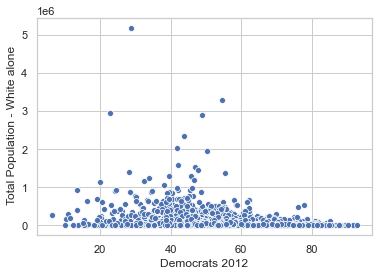

In [107]:
###EDA

#election_demographic.columns[0:40]
#sns.scatterplot(data=election_demographic, x="Republicans 2016", y=" Total Population - White alone")
#sns.scatterplot(data=election_demographic, x="Democrats 2012", y=" Total Population - White alone")
#sns.scatterplot(data=election_demographic, x="Democrats 2016", y=" Total Population - White alone")



In [109]:
from rfpimp import plot_corr_heatmap

viz = plot_corr_heatmap(election_demographic.loc[8:13], figsize=(7,5))
viz.view()

ModuleNotFoundError: No module named 'rfpimp'